In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil,sqrt
from sklearn.cluster import KMeans

def datos(archivo):
    ### extraer los datos ###
    datos = pd.read_csv(archivo,index_col=0) #
#    datos = np.array(datos) #equivalente a datos.values debido a que pandas esda basado en numpy. 
    datos = datos.values
    return (datos)

def cluster(datos, clusters):
    model = KMeans(n_clusters=clusters) # sci_kit_learn tiene un algoritmo de clustering en dónde solamente necesita especificarse el número de 
    model = model.fit(datos)
    return(model.cluster_centers_, model.predict(datos), model.inertia_)


    
close = datos("CloseAC.csv") #se sacan los datos de cierre y volumen para trabajar con ellos. 
volume = datos("VolumeAC.csv")

# Graficar Codos en volumen:

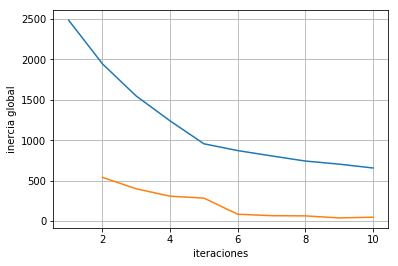

In [2]:
x = 10 ### modificar este para evaluar los datos con n centroides. 

centroides,grupos,total_inercia = [],[],[]
for i in range(1,x+1):
    k_values = cluster(volume, i)
    
    centroides.append(k_values[0]) #almacenar datos en listas. 
    grupos.append(k_values[1])
    total_inercia.append(k_values[2])

#%%
dif_inercia = [total_inercia[i] - total_inercia[i+1] for i in range(len(total_inercia)-1)] #grafica la diferencia entre cada una de las inercias. sirve para encontrar el "codo".
    
### se grafican las inercias globales (total_inercia) para conocer el 'codo'  
plt.plot(np.arange(1,len(total_inercia)+1),total_inercia)
plt.plot(np.arange(2,len(total_inercia)+1),dif_inercia)
plt.xlabel('iteraciones')
plt.ylabel('inercia global')
plt.grid()
plt.show()

**2 o 5 centroides**:

Considerando la gráfica de inercias globales podemos apreciar que se presenta un codo cuando hay 5 centroides, así como también se presenta con 2 centroides. 

# graficamos centroides en volumen:

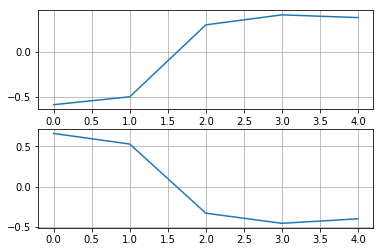

In [3]:
### se grafican los centroides. 
cen = 2  ### modificar este para graficar n clusters. 
for i in range(len(centroides[cen - 1])):
    plt.subplot(ceil(sqrt(cen)),round(sqrt(cen)),i+1)
    plt.grid()
    plt.plot(centroides[cen - 1][i],label=('centroide %i'%i))
#plt.legend(loc='best')
plt.show()

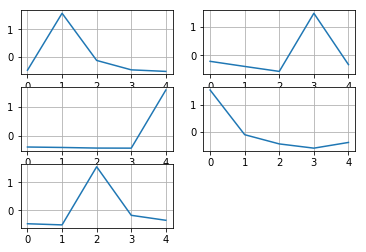

In [4]:
### se grafican los centroides. 
cen = 5 ### modificar este para graficar n clusters. 
for i in range(len(centroides[cen - 1])):
    plt.subplot(ceil(sqrt(cen)),round(sqrt(cen)),i+1)
    plt.grid()
    plt.plot(centroides[cen - 1][i],label=('centroide %i'%i))
#plt.legend(loc='best')
plt.show()

# Graficar Codos en cierre:

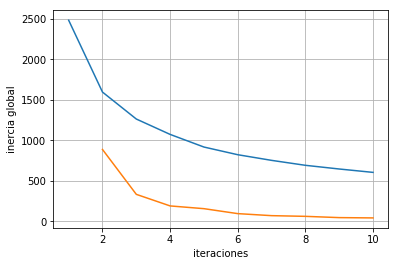

In [5]:
x = 10 ### modificar este para evaluar los datos con n centroides. 

centroides,grupos,total_inercia = [],[],[]
for i in range(1,x+1):
    k_values = cluster(close, i)
    
    centroides.append(k_values[0]) #almacenar datos en listas. 
    grupos.append(k_values[1])
    total_inercia.append(k_values[2])

#%%
dif_inercia = [total_inercia[i] - total_inercia[i+1] for i in range(len(total_inercia)-1)] #grafica la diferencia entre cada una de las inercias. sirve para encontrar el "codo".
    
### se grafican las inercias globales (total_inercia) para conocer el 'codo'  
plt.plot(np.arange(1,len(total_inercia)+1),total_inercia)
plt.plot(np.arange(2,len(total_inercia)+1),dif_inercia)
plt.xlabel('iteraciones')
plt.ylabel('inercia global')
plt.grid()
plt.show()

# Graficamos centroides en cierre

### 4 centroides. 

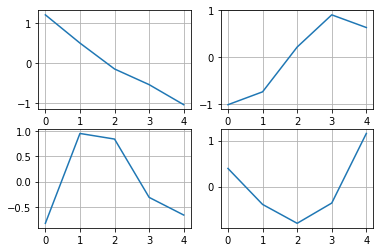

In [6]:
### se grafican los centroides. 
cen = 4  ### modificar este para graficar n clusters. 
for i in range(len(centroides[cen - 1])):
    plt.subplot(ceil(sqrt(cen)),round(sqrt(cen)),i+1)
    plt.grid()
    plt.plot(centroides[cen - 1][i],label=('centroide %i'%i))
#plt.legend(loc='best')
plt.show()

# Probabilidades de Markov

### Agrupamos. 

In [10]:
### da nombre a cada una de los casos en las que se encuentran. Previo a hacer la tabla de probabilidades de Markov.

Cl,Vo = cluster(close,4)[1],cluster(volume,5)[1] #se decidió tomar 4 centroides para cierre y 2 para volumen.

Gr = [[Cl[i],Vo[i]] for i in range(len(Cl))] #se agrupa cada uno de los casos de cierre y volumen en una lista. 
Dic = [[i,j] for i in range(len(pd.value_counts(Cl))) for j in range(len(pd.value_counts(Vo)))] #se hace un diccionario de las combinaciones existentes en estos dos casos. 

n_g = np.zeros(len(Cl)) #lista en blanco dónde se escribirá cada combinación según sea el caso. 
for j in range(len(Dic)): 
    for i in range(len(Gr)):
        if Dic[j] == Gr[i]:
            n_g[i] = j

### Imprimimos Tabla de frecuencias.

In [31]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [26]:
### Matriz de Probabilidades de Markov. 
Tam = len(pd.value_counts(n_g)) #Tamaño de la matriz cuadrada.
N = np.zeros((Tam,Tam))         

for i in range(Tam):
    for j in range(Tam):
        for k in range(len(n_g)-1):
            if n_g[k+1]==j and n_g[k]==i:
                N[i][j] += 1

In [34]:
Markov = pd.DataFrame(data=N.T)
Markov.columns = [str(i) for i in Dic]
Markov.index = [str(i) for i in Dic]
Markov = Markov.style.background_gradient()
Markov

,"[0, 0]","[0, 1]","[0, 2]","[0, 3]","[0, 4]","[1, 0]","[1, 1]","[1, 2]","[1, 3]","[1, 4]","[2, 0]","[2, 1]","[2, 2]","[2, 3]","[2, 4]","[3, 0]","[3, 1]","[3, 2]","[3, 3]","[3, 4]"
"[0, 0]",1,0,0,1,1,1,4,1,2,4,0,0,2,1,1,0,0,0,0,0
"[0, 1]",0,0,0,1,0,0,0,1,7,1,0,1,0,3,1,0,0,0,0,0
"[0, 2]",0,0,0,0,1,0,11,0,0,2,0,2,0,0,1,0,0,0,0,0
"[0, 3]",3,0,0,0,1,7,0,0,0,1,1,0,0,0,2,0,0,0,0,0
"[0, 4]",0,0,0,0,1,0,0,8,1,3,0,0,1,0,0,0,0,2,0,0
"[1, 0]",0,0,0,0,0,6,8,2,2,6,0,0,0,0,0,3,1,0,1,5
"[1, 1]",0,0,0,0,0,2,0,0,19,1,0,0,0,0,0,0,1,0,10,0
"[1, 2]",0,0,0,0,0,2,8,0,0,3,0,0,0,0,0,0,14,0,0,0
"[1, 3]",0,0,0,0,0,13,0,1,0,4,0,0,0,0,0,12,1,1,0,4
"[1, 4]",0,0,0,0,0,0,0,12,1,2,0,0,0,0,0,0,0,9,0,4


## falta dividir la tabla de frecuencias entre la cantidad de elementos por columna para conseguir una tabla de probabilidades. 